In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.decomposition import PCA, TruncatedSVD

# Reading the Data

In [2]:
train = pd.read_csv('train_auto.csv')
test = pd.read_csv('test_auto.csv')
test_y = pd.read_csv('SHELL_AUTO.csv')

In [3]:
train_y = train['TARGET_FLAG']
train_y1 = train['TARGET_AMT']

In [4]:
train_y.value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

In [5]:
train_y1.describe()

count      8161.000000
mean       1504.324648
std        4704.026930
min           0.000000
25%           0.000000
50%           0.000000
75%        1036.000000
max      107586.136160
Name: TARGET_AMT, dtype: float64

In [6]:
train = train.drop(columns = ['TARGET_FLAG','TARGET_AMT'])
test = test.drop(columns=['TARGET_FLAG','TARGET_AMT'])

In [7]:
train.describe()

,INDEX,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


In [8]:
train.dtypes

INDEX           int64
KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
SEX            object
EDUCATION      object
JOB            object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CAR_AGE       float64
URBANICITY     object
dtype: object

In [9]:
pd.isnull(train).sum()

INDEX           0
KIDSDRIV        0
AGE             6
HOMEKIDS        0
YOJ           454
INCOME        445
PARENT1         0
HOME_VAL      464
MSTATUS         0
SEX             0
EDUCATION       0
JOB           526
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE       510
URBANICITY      0
dtype: int64

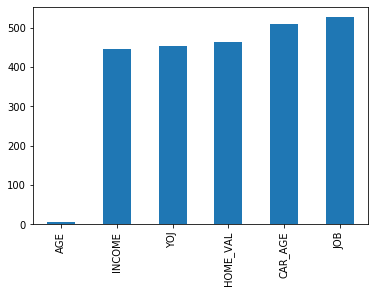

In [10]:
missing_train=train.isna().sum()
missing_train=missing_train[missing_train>0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()

In [11]:
val_col = ['AGE', 'YOJ', 'CAR_AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

for i in val_col:
    train[i]=train[i].fillna(0).values
    train[i] = train[i].replace('[\$,]', '', regex=True).astype(float)

In [12]:
train['JOB'] = train['JOB'].fillna('Null').values

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in train.columns:
    if train[column_name].dtype == object:
        print(column_name)
        train[column_name] = le.fit_transform(train[column_name].values)
    else:
        pass

PARENT1
MSTATUS
SEX
EDUCATION
JOB
CAR_USE
CAR_TYPE
RED_CAR
REVOKED
URBANICITY


In [14]:
train.dtypes

INDEX           int64
KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1         int64
HOME_VAL      float64
MSTATUS         int64
SEX             int64
EDUCATION       int64
JOB             int64
TRAVTIME        int64
CAR_USE         int64
BLUEBOOK      float64
TIF             int64
CAR_TYPE        int64
RED_CAR         int64
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED         int64
MVR_PTS         int64
CAR_AGE       float64
URBANICITY      int64
dtype: object

In [15]:
for i in train.columns:
    if train[i].dtype == object:
        print(i)
        train[i] = train[i].apply(pd.to_numeric, errors='coerce')

In [16]:
train.head(5)

,INDEX,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,60.0,0,11.0,67349.0,0,0.0,1,0,...,14230.0,11,0,1,4461.0,2,0,3,18.0,0
1,2,0,43.0,0,11.0,91449.0,0,257252.0,1,0,...,14940.0,1,0,1,0.0,0,0,0,1.0,0
2,4,0,35.0,1,10.0,16039.0,0,124191.0,0,1,...,4010.0,4,5,0,38690.0,2,0,3,10.0,0
3,5,0,51.0,0,14.0,0.0,0,306251.0,0,0,...,15440.0,7,0,1,0.0,0,0,0,6.0,0
4,6,0,50.0,0,0.0,114986.0,0,243925.0,0,1,...,18000.0,1,5,0,19217.0,2,1,3,17.0,0


# Dimensionality Reduction

## SVD

In [17]:
model=TruncatedSVD(n_components = 10)

In [18]:
s = model.fit_transform(train)

In [19]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'SVD{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [20]:
df

,0,1
0,SVD0,HOME_VAL
1,SVD1,INCOME
2,SVD2,BLUEBOOK
3,SVD3,OLDCLAIM
4,SVD4,INDEX
5,SVD5,TRAVTIME
6,SVD6,AGE
7,SVD7,CAR_AGE
8,SVD8,YOJ
9,SVD9,TIF


In [21]:
U,S,V=np.linalg.svd(train, full_matrices=True)

In [22]:
pivot=sum(S)
accum=0
count=0
for each in S:
    count+=1
    accum+=(each/pivot)*100
    print(accum,"by ",count," variables")

75.14399602231356 by  1  variables
91.54662241588245 by  2  variables
95.51607851022256 by  3  variables
98.65302439785006 by  4  variables
99.97682547567992 by  5  variables
99.98530614946962 by  6  variables
99.98983809527607 by  7  variables
99.99183590755717 by  8  variables
99.9935250033713 by  9  variables
99.99505030128056 by  10  variables
99.9961035272682 by  11  variables
99.99689081523381 by  12  variables
99.99761267720046 by  13  variables
99.9981489747314 by  14  variables
99.9985507226351 by  15  variables
99.99889518800346 by  16  variables
99.99909800660716 by  17  variables
99.99927150254167 by  18  variables
99.99943038667911 by  19  variables
99.99957781343927 by  20  variables
99.99971402022892 by  21  variables
99.99981938173934 by  22  variables
99.99991672008649 by  23  variables
100.00000000000006 by  24  variables


### We can observe that 5 variables cover 99 percent of the features of data. The most important of them are the top 5 given by SVD. We can train on these features itself and can ignore the least featuristic variables. This is inturn called as reducing the dimensionality

## PCA

In [23]:
pca=PCA(n_components=10)
pca.fit(train)
pc=pca.transform(train)

In [24]:
print(np.sum(pca.explained_variance_ratio_))

0.999999998919085


In [25]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [26]:
df

,0,1
0,PC0,HOME_VAL
1,PC1,INCOME
2,PC2,OLDCLAIM
3,PC3,BLUEBOOK
4,PC4,INDEX
5,PC5,TRAVTIME
6,PC6,AGE
7,PC7,CAR_AGE
8,PC8,YOJ
9,PC9,TIF


In [27]:
df[1].values

array(['HOME_VAL', 'INCOME', 'OLDCLAIM', 'BLUEBOOK', 'INDEX', 'TRAVTIME',
       'AGE', 'CAR_AGE', 'YOJ', 'TIF'], dtype=object)